# Netflix Content Type Analysis

This notebook takes a deepdive into analysis and visualization of Netflix Movies and TV shows using r's ggplot. 

I do not own the license to the dataset used in this analysis, thank to Shivamb's [Netflix Movies and TV Shows](http://www.kaggle.com/datasets/shivamb/netflix-shows) dataset.

In [1]:
# Load the relevant packages for this project.
library(tidyverse) #For data manipulation
library(ggplot2) #For data visualization
library(ggthemes) #Provides additional themes and visual styles.
library(lubridate) #Working with dates and times

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Data Import And Preview

Import your data using r's readr function --read.csv-- then have a preview using head and str functions

In [2]:
netflix_data <- read.csv("/kaggle/input/netflix-shows/netflix_titles.csv")

str(netflix_data)
head(netflix_data)

'data.frame':	8807 obs. of  12 variables:
 $ show_id     : chr  "s1" "s2" "s3" "s4" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "TV Show" ...
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Ganglands" "Jailbirds New Orleans" ...
 $ director    : chr  "Kirsten Johnson" "" "Julien Leclercq" "" ...
 $ cast        : chr  "" "Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile "| __truncated__ "Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, G"| __truncated__ "" ...
 $ country     : chr  "United States" "South Africa" "" "" ...
 $ date_added  : chr  "September 25, 2021" "September 24, 2021" "September 24, 2021" "September 24, 2021" ...
 $ release_year: int  2020 2021 2021 2021 2021 2021 2021 1993 2021 2021 ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ duration    : chr  "90 min" "2 Seasons" "1 Season" "1 Season" ...
 $ listed_in 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
2,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
4,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
5,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe."


## Data Preparation

Get rid of columns which we will not need in this analysis i.e description, cast, listed_in

In [3]:
netflix_data <- netflix_data %>% 
  select(-c(description, cast, listed_in))

head(netflix_data)

,show_id,type,title,director,country,date_added,release_year,rating,duration
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
2,s2,TV Show,Blood & Water,,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,s3,TV Show,Ganglands,Julien Leclercq,,"September 24, 2021",2021,TV-MA,1 Season
4,s4,TV Show,Jailbirds New Orleans,,,"September 24, 2021",2021,TV-MA,1 Season
5,s5,TV Show,Kota Factory,,India,"September 24, 2021",2021,TV-MA,2 Seasons
6,s6,TV Show,Midnight Mass,Mike Flanagan,,"September 24, 2021",2021,TV-MA,1 Season


## Analysis

### Visualization

#### Overall Content Types
The first analysis will be to check the overall types of Netflix contents

In [4]:
# Create a dataframe that will be used to creat a plot 

types <- netflix_data %>% 
  group_by(type) %>% 
  summarize(count=n())

head(types)

type,count
<chr>,<int>
Movie,6131
TV Show,2676


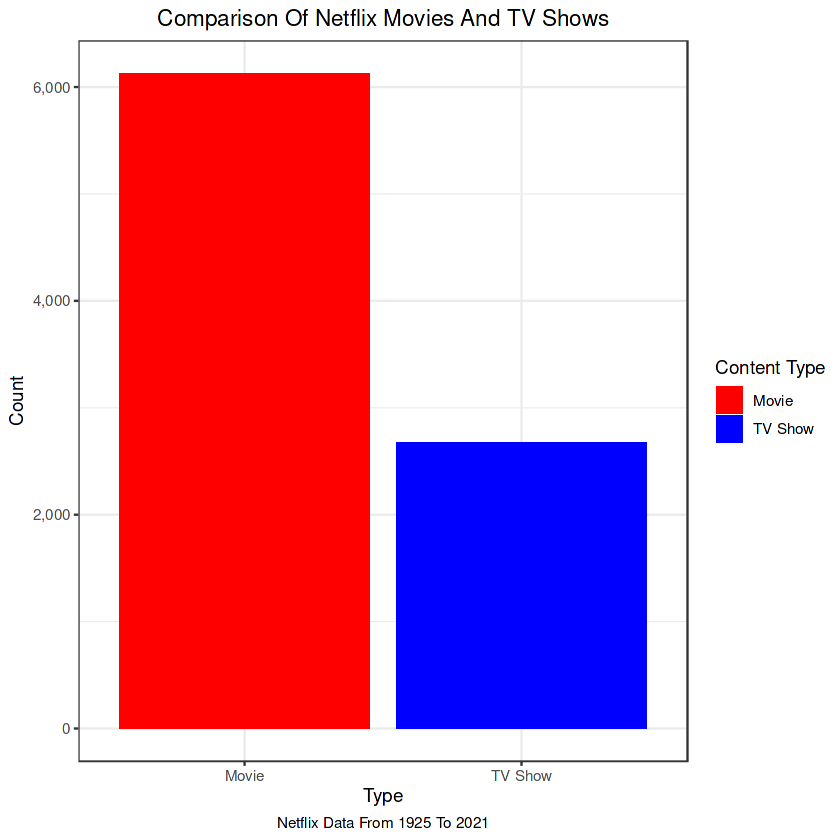

In [5]:
# Creating a column chart using the above dataframe 

ggplot(types, aes(type, count, fill = type))+
  geom_col()+ 
  labs(title ="Comparison Of Netflix Movies And TV Shows",
  caption = "Netflix Data From 1925 To 2021",
  x="Type",
  y="Count",
  fill="Content Type")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption =  element_text(hjust = 0.5))+
  scale_fill_manual(values = c("red", "blue"))+
  scale_y_continuous(labels = scales::comma)

**The analysis above shows that there are more Netflix Movies that TV Shows from 1925 to 2021.**

#### Content Types In Top 10 Countries

In [6]:
# Generate a dataframe to be used in analyzing different content types in Top 10 countries.

country_type <- netflix_data %>% 
  select(country, type) %>% 
  filter(country!="") %>%  
  group_by(type, country) %>% 
  summarize(count=n()) %>% 
  arrange(desc(count)) %>% 
  slice(1:10)

head(country_type)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,country,count
<chr>,<chr>,<int>
Movie,United States,2058
Movie,India,893
Movie,United Kingdom,206
Movie,Canada,122
Movie,Spain,97
Movie,Egypt,92


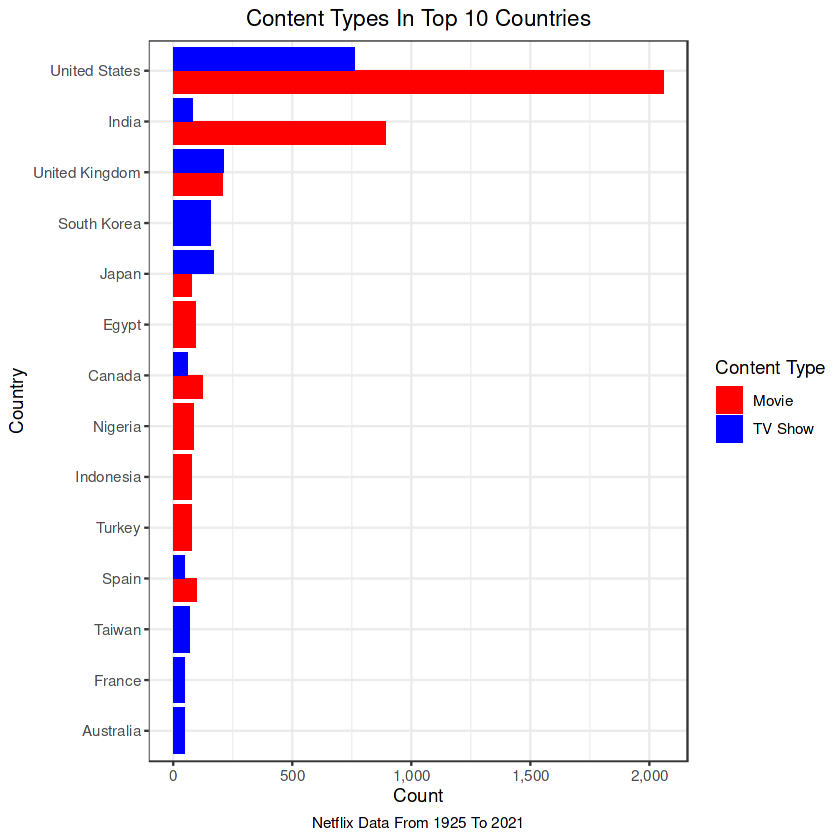

In [7]:
# Now create a plot

ggplot(country_type, aes(reorder(country, count) , count, fill=type))+
  geom_col(position = "dodge")+
  coord_flip()+
  labs(title = "Content Types In Top 10 Countries",
       caption = "Netflix Data From 1925 To 2021",
       y="Count",
       x="Country",
       fill= "Content Type")+
  theme_bw()+
  scale_y_continuous(labels = scales::comma)+
  scale_fill_manual(values = c("red", "blue"))+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**The above visualization shows that United States and India tops in movies and TV Shows respectively**

#### Top Directors Per Content Type

In [8]:
director_type <- netflix_data %>% 
  select(type, director) %>% 
  filter(director!="") %>% 
  group_by(type, director) %>% 
  summarize(count=n()) %>% 
  arrange(desc(count)) %>% 
  slice(1:10)

head(director_type)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,director,count
<chr>,<chr>,<int>
Movie,Rajiv Chilaka,19
Movie,"Raúl Campos, Jan Suter",18
Movie,Suhas Kadav,16
Movie,Marcus Raboy,15
Movie,Jay Karas,14
Movie,Cathy Garcia-Molina,13


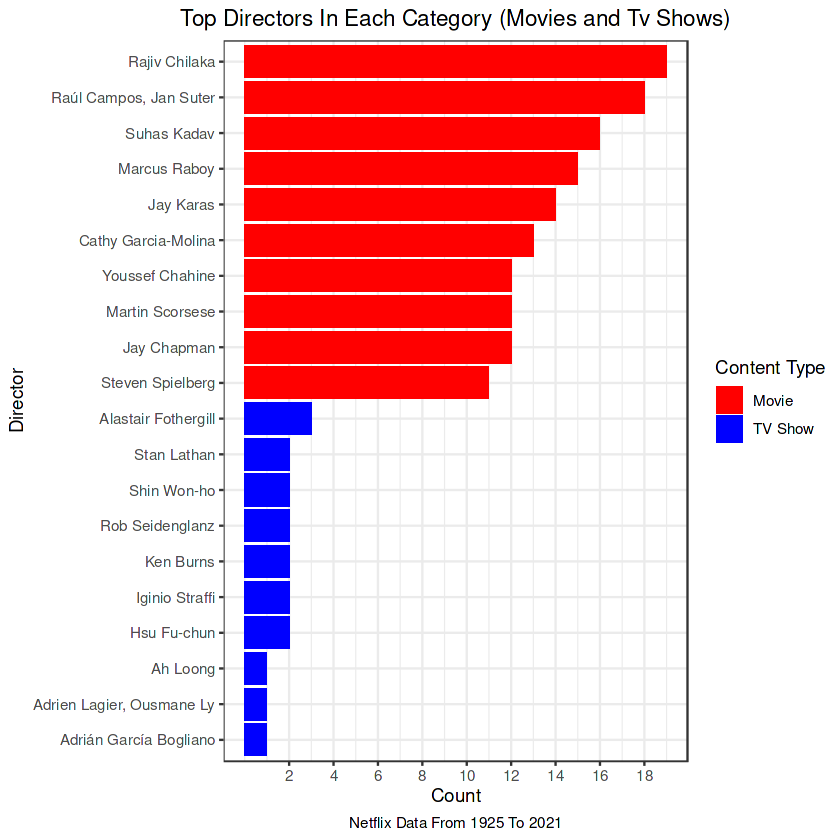

In [9]:
ggplot(director_type, aes(reorder(director, count), count, fill= type))+
  geom_col()+
  coord_flip()+
  labs(title = "Top Directors In Each Category (Movies and Tv Shows)",
       caption = "Netflix Data From 1925 To 2021",
       y="Count",
       x="Director",
       fill= "Content Type")+
  scale_y_continuous(breaks = seq(2, max(director_type$count), by = 2))+
  theme_bw()+
  scale_fill_manual(values = c("red", "blue"))+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**In the visualization above, Rajiv Chilaka tops in the Movies category followed by Raúl Campos while in the TV Shows category, Alastair Fothergill comes first.**

#### Movie Durations Over Years

In [10]:
movie_length <- netflix_data %>%
    mutate(duration = as.numeric(gsub("min", "", as.character(duration)))) %>%
    filter(type == "Movie", !is.na(duration)) %>% 
    select(release_year, duration) %>% 
    group_by(release_year) %>% 
    summarize(average_duration = mean(duration))
  
head(movie_length)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `duration = as.numeric(gsub("min", "",
  as.character(duration)))`.
Caused by warning:
! NAs introduced by coercion”


release_year,average_duration
<int>,<dbl>
1942,35.00000
1943,62.66667
1944,52.00000
1945,51.33333
1946,58.00000
1947,42.00000


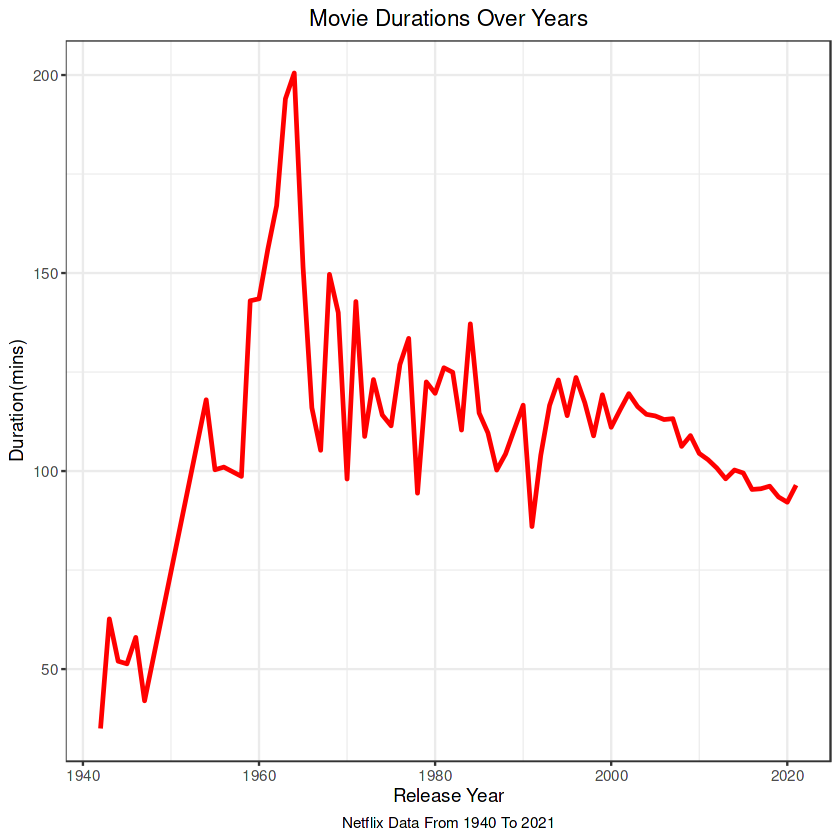

In [11]:
ggplot(movie_length, aes(release_year, average_duration))+
  geom_line(linewidth=1, color="red")+
  labs(title = "Movie Durations Over Years",
       caption = "Netflix Data From 1940 To 2021",
       y="Duration(mins)",
       x="Release Year",
       color= "")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**In the above visualization, the average duration of a movie rose throughout the first 3 quaters of the 20th century. There was a drastic drop in 1965 till around the 1970s. Somewhere during the last quater till the 21st century, the average duration stabilized.**

#### TV Show Durations Over Years

In [12]:
Tvshow_length <- netflix_data %>%
  mutate(duration = as.numeric(gsub("Seasons|Season", "", duration))) %>%
  filter(type == "TV Show", !is.na(duration)) %>% 
  select(duration, release_year) %>% 
  group_by(release_year) %>% 
  summarize(average_duration = round(mean(duration)))
  
head(Tvshow_length)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `duration = as.numeric(gsub("Seasons|Season", "", duration))`.
Caused by warning:
! NAs introduced by coercion”


release_year,average_duration
<int>,<dbl>
1925,1
1945,1
1946,1
1963,4
1967,8
1972,1


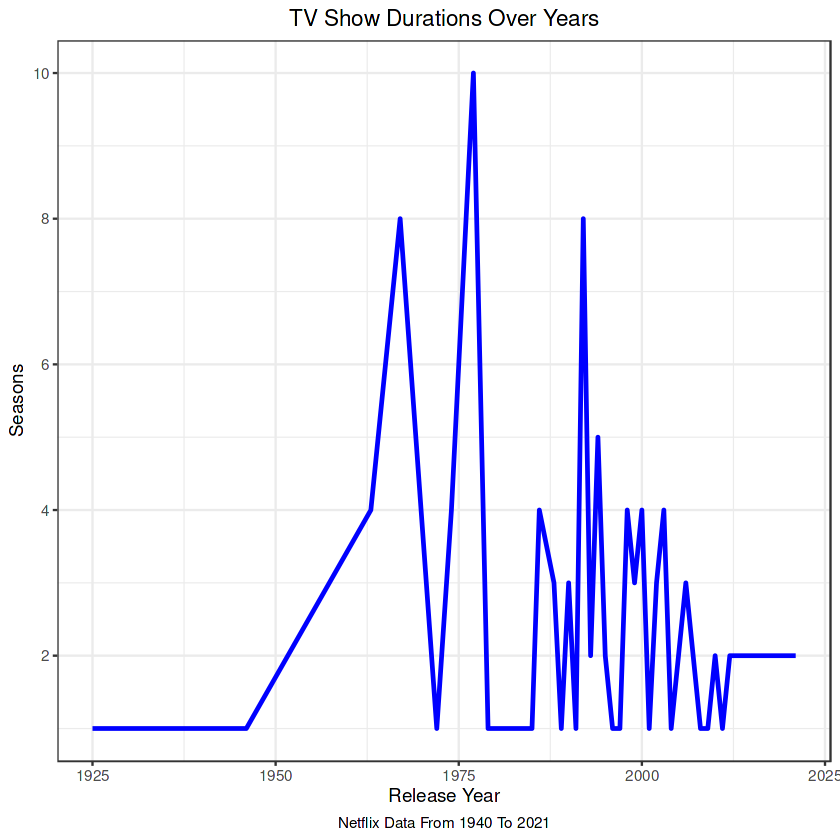

In [13]:
ggplot(Tvshow_length, aes(release_year, average_duration))+
  geom_line(linewidth=1, color="blue")+
  labs(title = "TV Show Durations Over Years",
       caption = "Netflix Data From 1940 To 2021",
       y="Seasons",
       x="Release Year",
       color= "")+
  scale_y_continuous(breaks = seq(2, max(Tvshow_length$average_duration), by=2))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

#### Top 10 Ratings By Content Type

In [14]:
rating_type <- netflix_data %>% 
  select(type, rating) %>%
  filter(rating!="") %>% 
  group_by(type, rating) %>% 
  summarize(count=n()) %>% 
  arrange(desc(count)) %>% 
  slice(1:10)

head(rating_type)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,rating,count
<chr>,<chr>,<int>
Movie,TV-MA,2062
Movie,TV-14,1427
Movie,R,797
Movie,TV-PG,540
Movie,PG-13,490
Movie,PG,287


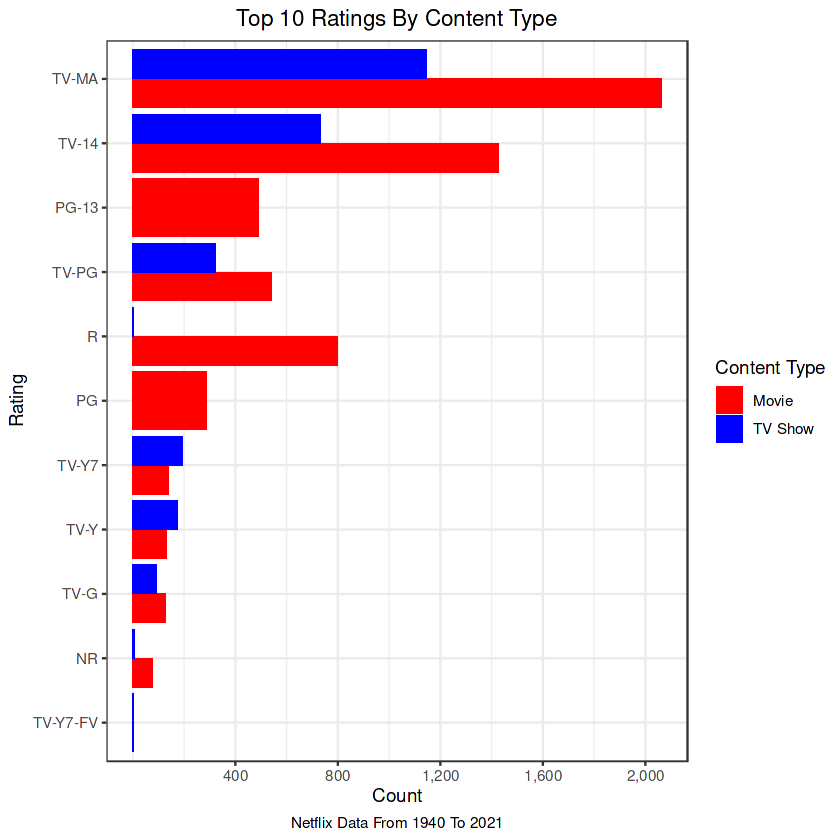

In [15]:
ggplot(rating_type, aes(reorder(rating, count) , count, fill=type))+
  geom_col(position="dodge")+
  coord_flip()+
  labs(title = "Top 10 Ratings By Content Type",
       caption = "Netflix Data From 1940 To 2021",
       x= "Rating",
       y= "Count",
       fill= "Content Type")+
  theme_bw()+
  scale_fill_manual(values = c("red", "blue"))+
  scale_y_continuous(breaks = seq(400, max(rating_type$count), by=400), labels = scales::comma)+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**The visualization above shows that there are many TV Shows and Movies rated TV-MA and TV-14.**

#### Ratings In Individual Categories

##### In Movies Category


In order to create a visualization in the Movies category, we may have to first check the top ratings in this content type

In [16]:
Movie_rating <- netflix_data %>% 
  select(type, rating) %>%
  filter(type== "Movie", rating!="") %>% 
  group_by(type, rating) %>% 
  summarize(count=n()) %>% 
  arrange(desc(count)) %>% 
  slice(1:5)

as_tibble(Movie_rating)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,rating,count
<chr>,<chr>,<int>
Movie,TV-MA,2062
Movie,TV-14,1427
Movie,R,797
Movie,TV-PG,540
Movie,PG-13,490


We can see that the top 5 ratings in the Movies category are **V-MA, TV-14, R, TV-PG and PG-13**. This information will help create another dataframe then filter out other ratings except V-MA, TV-14, R, TV-PG and PG-13. We will focus only in movies released from the year 2000. 

In [17]:
# Creating a dataframe to narrow down to the following ratings V-MA, TV-14, R, TV-PG and PG-13

Movie_rating_date <- netflix_data %>% 
  filter(release_year >= 2000, type== "Movie", rating %in% c("TV-MA", "TV-14", "R", "TV-PG", "PG-13")) %>%
  group_by(release_year, rating) %>% 
  summarize(count=n())

head(Movie_rating_date)

`summarise()` has grouped output by 'release_year'. You can override using the
`.groups` argument.


release_year,rating,count
<int>,<chr>,<int>
2000,PG-13,10
2000,R,8
2000,TV-14,5
2000,TV-MA,1
2000,TV-PG,3
2001,PG-13,8


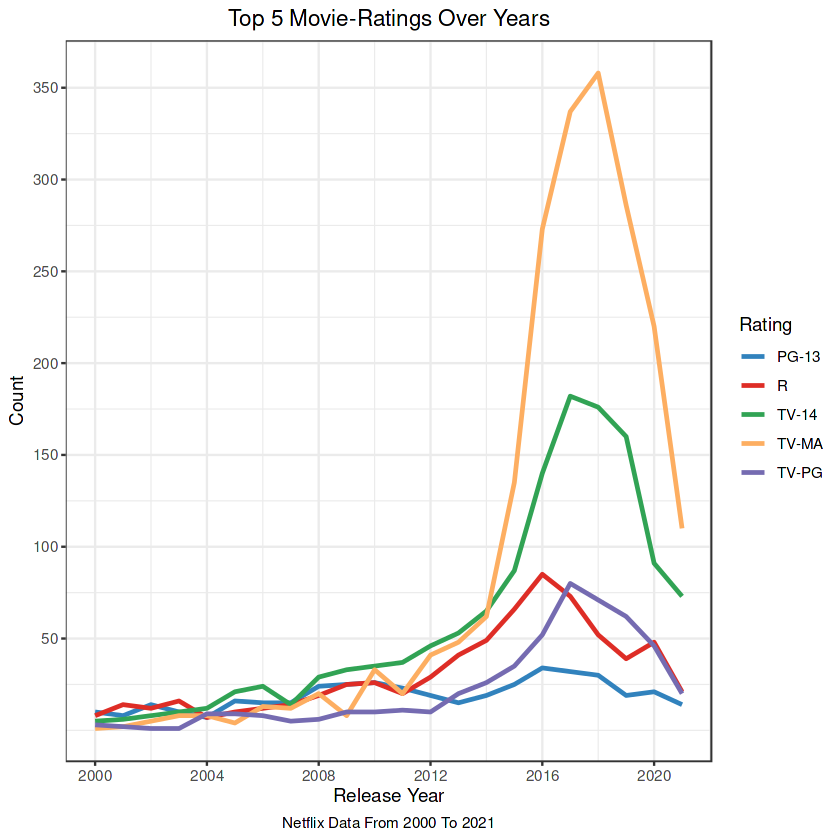

In [18]:
ggplot(Movie_rating_date, aes(release_year, count, color= rating, group=rating))+
  geom_line(linewidth=1)+
  labs(title = "Top 5 Movie-Ratings Over Years",
       caption = "Netflix Data From 2000 To 2021",
       x= "Release Year",
       y= "Count",
       color= "Rating")+
  theme_bw()+
  scale_color_manual(values = c("#3182bd", "#de2d26", "#31a354", "#fdae61", "#756bb1"))+
  scale_x_continuous(breaks =  seq(4, max(Movie_rating_date$release_year), by=4))+
  scale_y_continuous(breaks = seq(50, max(Movie_rating_date$count), by=50))+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**In the visuallization above, we can see that all ratings constantly rose from the year 2000. However, there was a considerate rise from the year 2014 till 2018 for the movies rated TV-14 and TV-MA.**

##### In The TV Shows Category

Just like Movies, we will first check the top 5 ratings in the this category too.

In [19]:
TVshow_rating <- netflix_data %>%
  select(type, rating) %>% 
  filter(type== "TV Show", rating!="") %>% 
  group_by(type, rating) %>% 
  summarize(count=n()) %>% 
  arrange(desc(count)) %>% 
  slice(1:5)
  
as_tibble(TVshow_rating)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,rating,count
<chr>,<chr>,<int>
TV Show,TV-MA,1145
TV Show,TV-14,733
TV Show,TV-PG,323
TV Show,TV-Y7,195
TV Show,TV-Y,176


In the above data, the top 5 ratings are **TV-MA, TV-14, TV-PG, TV-Y7, TV-Y**. We will use this information to create a TV Shows dataframe that only has these ratings.

In [20]:
TVshow_rating_date <- netflix_data %>% 
  filter(release_year >= 2000, type== "TV Show", rating %in% c("TV-MA", "TV-14", "TV-PG", "TV-Y7", "TV-Y")) %>% 
  group_by(release_year, rating) %>% 
  summarize(count=n())

`summarise()` has grouped output by 'release_year'. You can override using the
`.groups` argument.


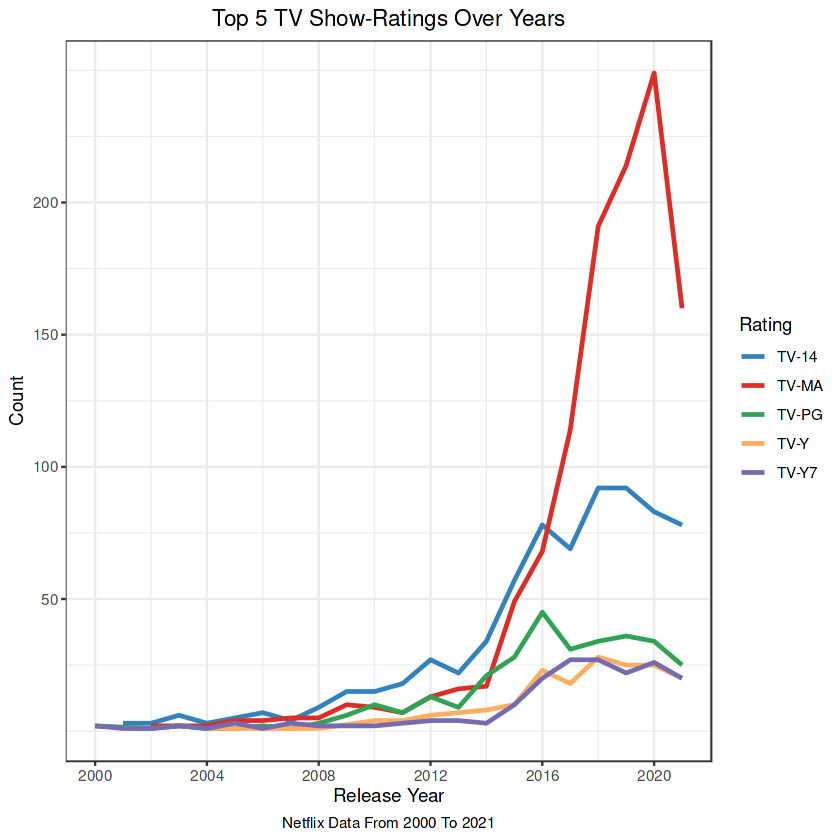

In [21]:
ggplot(TVshow_rating_date, aes(x=release_year, y=count, color=rating, group=rating))+
  geom_line(linewidth=1)+
  labs(title = "Top 5 TV Show-Ratings Over Years",
       caption = "Netflix Data From 2000 To 2021",
       x= "Release Year",
       y= "Count",
       color= "Rating")+
  theme_bw()+
  scale_color_manual(values = c("#3182bd", "#de2d26", "#31a354", "#fdae61", "#756bb1"))+
  scale_x_continuous(breaks =  seq(4, max(TVshow_rating_date$release_year), by=4))+
  scale_y_continuous(breaks = seq(50, max(TVshow_rating_date$count), by=50))+
  theme(plot.title = element_text(hjust = 0.5),
        plot.caption = element_text(hjust = 0.5))

**From the above visualizations, all the top five ratings rose constantly from the year 2000 till 2014. TV-MA however shot up from then to the year 2020 and this rise was then preceded by a drastic dip.**